In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [45]:
ETHUSD = 3094.27


colors = ["#012060", "#1ba9e7", "#ffa12b", "#febbfe", "#4cffdf", "#965ff6", "#cbebfa" ,"#012060", "#1ba9e7"]
custom_pallet = sns.color_palette(colors)
# Set your custom color palette
sns.set_context("notebook", font_scale=1.15)
sns.set_style("ticks")
sns.set_palette(custom_pallet)
#sns.despine(offset=10, trim=True);

In [249]:
google_trends = pd.read_csv('./datasets/google_trends.csv', index_col='week', parse_dates=['week'])
google_trends.columns = ['Trabajo', 'Axie Infinity', 'Plant Vs Undead']
google_trends = google_trends.rolling(2).mean()

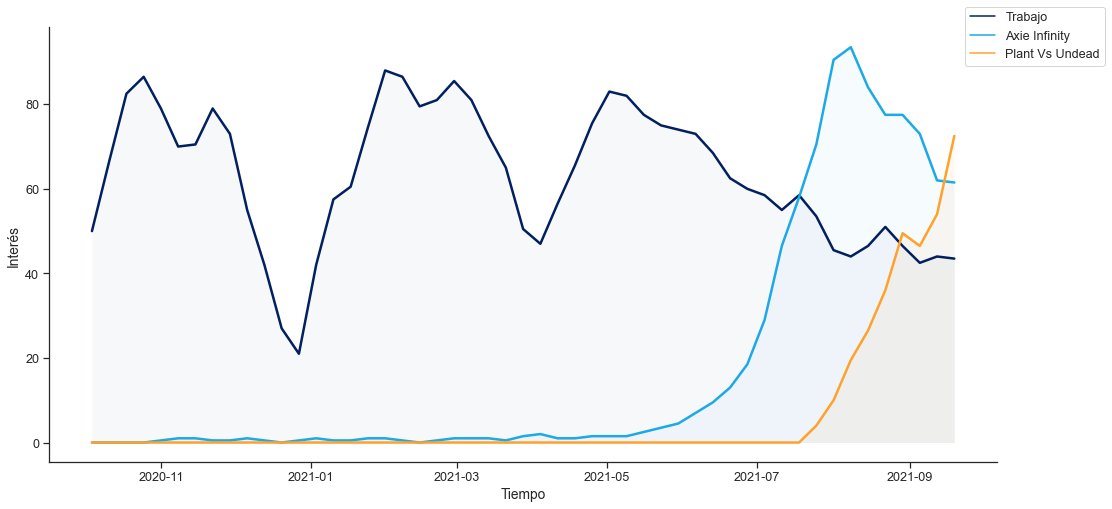

In [250]:
fig = plt.figure(figsize=(17,8))
sns.lineplot(data=google_trends, linewidth=2.5, dashes=False)
plt.fill_between(google_trends.index, google_trends['Trabajo'], alpha=0.03)
plt.fill_between(google_trends.index, google_trends['Axie Infinity'], alpha=0.04)
plt.fill_between(google_trends.index, google_trends['Plant Vs Undead'], alpha=0.06)
plt.ylabel('Interés')
plt.xlabel('Tiempo')
sns.despine()
plt.legend(loc='center right', bbox_to_anchor=(1.12, 0.98), ncol=1)
fig.savefig('./images/trends.png', transparent=True)

In [48]:
col_dtypes = {
    'id':'uint32',
    'sireId':'uint16',
    'matronId':'uint16',
    'birthDate':'uint32',
    'stage':'uint8',
    'breedCount':'uint8',
    'level':'uint8',
    'hp':'uint8',
    'speed':'uint8',
    'skill':'uint8',
    'morale':'uint8',
    'withPrice': 'float32'
}

axies = pd.read_csv('./datasets/dataset_0_25000.csv', index_col='txHash', dtype=col_dtypes, parse_dates=['birthDate', 'timestamp'])
axies['withPriceUsd'] = ETHUSD * axies['withPrice']
axies['birthDate'] = pd.to_datetime(axies['birthDate'], unit='s')
axies['timestamp'] = pd.to_datetime(axies['timestamp'], unit='s')
axies.drop(columns=['stage','title', 'level', 'Unnamed: 0'], inplace=True)
axies = axies[ (axies['timestamp'] > datetime(2021,1,1)) & (axies['withPrice'] < 2)]

<AxesSubplot:xlabel='timestamp', ylabel='withPrice'>

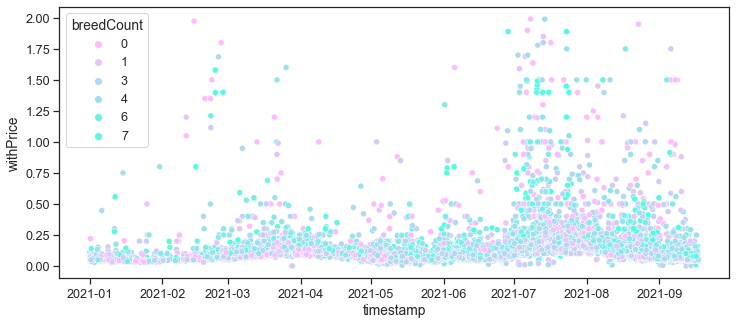

In [13]:
fig = plt.figure(figsize=(12,5))
sns.scatterplot(data=axies, x='timestamp', y='withPrice', hue='breedCount', palette=sns.color_palette("Blues", as_cmap=True))

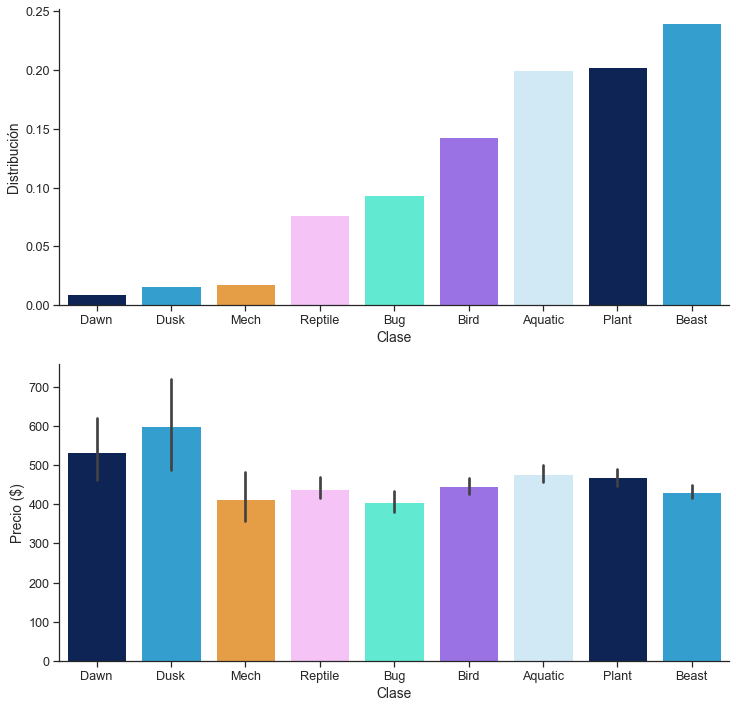

In [53]:
ax_sub = axies.groupby(['class']).agg({'id':'count'})
ax_sub.id = ax_sub.id / ax_sub.id.sum()
ax_sub = ax_sub.sort_values('id').reset_index()
sns.set_style("ticks")
fig, [ax1, ax2] = plt.subplots(2,1,figsize=(12,12))

sns.barplot(data=ax_sub, x='class', y='id', ax=ax1, label='')
ax1.set_ylabel('Distribución')
ax1.set_xlabel('Clase')

sns.barplot(data=axies, x='class', y='withPriceUsd', label='Precio ($)', ax=ax2, order=ax_sub['class'])
ax2.set_ylabel('Precio ($)')
ax2.set_xlabel('Clase')

sns.despine()
fig.savefig('./images/clase.png', transparent=True)

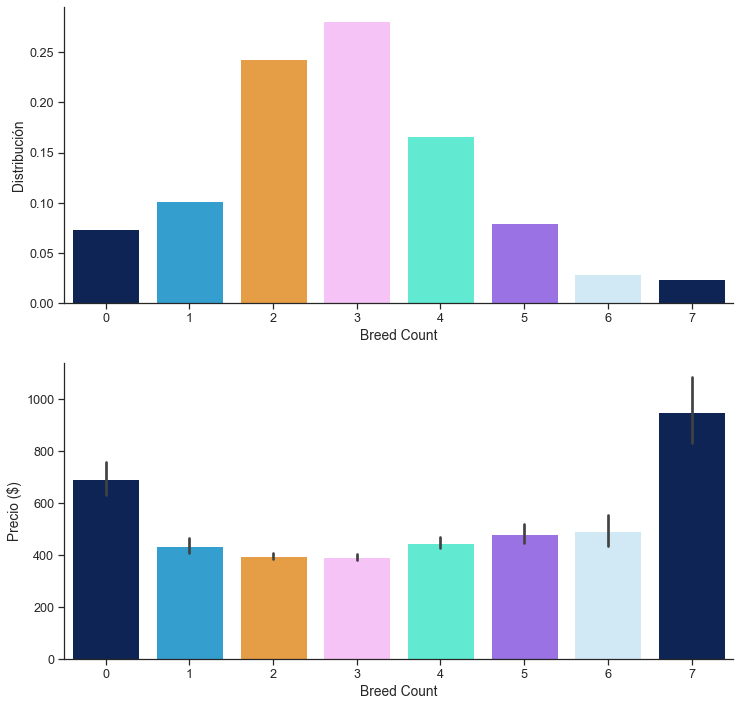

In [54]:
axis_breed = axies.groupby('breedCount').agg({'id':'count','withPrice':'mean'})
axis_breed.id = axis_breed.id / axis_breed.id.sum()
axis_breed = axis_breed.reset_index()

fig, [ax1, ax2] = plt.subplots(2,1,figsize=(12,12))

sns.barplot(data=axis_breed, x='breedCount', y='id', ax=ax1)
ax1.set_ylabel('Distribución')
ax1.set_xlabel('Breed Count')

sns.barplot(data=axies, x='breedCount', y='withPriceUsd', ax=ax2)
vals = ax2.get_yticks()
ax2.set_ylabel('Precio ($)')
ax2.set_xlabel('Breed Count')

sns.despine()
fig.savefig('./images/breedcount.png', transparent=True)

In [43]:
axies_corr = axies.corr()

corr = axies_corr.withPrice.sort_values(ascending=False).to_frame()
corr = corr.reset_index()
corr = corr.iloc[1:-3]

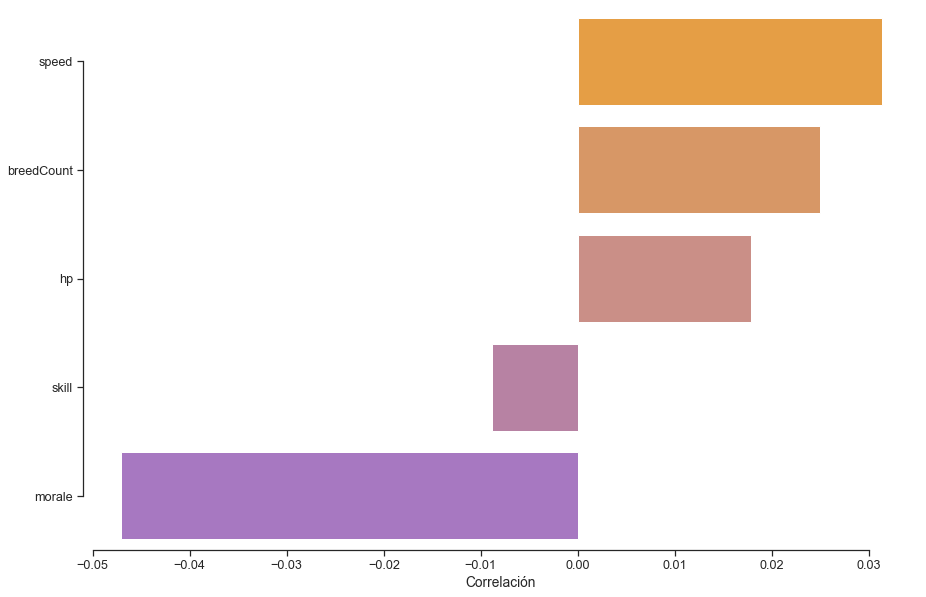

In [80]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x="withPrice", y="index", data=corr, label="Alcohol-involved", palette=sns.color_palette("blend:#ffa12b,#965ff6"))
sns.despine(trim=True)
plt.xlabel('Correlación')
plt.ylabel('')
fig.savefig('./images/correlation.png', transparent=True)

In [294]:
axies.sample(5).image.values

array(['https://storage.googleapis.com/assets.axieinfinity.com/axies/222773/axie/axie-full-transparent.png',
       'https://storage.googleapis.com/assets.axieinfinity.com/axies/64651/axie/axie-full-transparent.png',
       'https://storage.googleapis.com/assets.axieinfinity.com/axies/107092/axie/axie-full-transparent.png',
       'https://storage.googleapis.com/assets.axieinfinity.com/axies/60490/axie/axie-full-transparent.png',
       'https://storage.googleapis.com/assets.axieinfinity.com/axies/55713/axie/axie-full-transparent.png'],
      dtype=object)

In [159]:
slp = pd.read_csv('./datasets/slp-usd-max.csv')
slp.date = slp.date.str.replace(' 00:00:00 UTC','')
slp.date = pd.to_datetime(slp.date)
slp = slp[slp.date > datetime(2021,1,1)]
slp = slp.set_index('date').sort_values('date', ascending=False)
slp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2021-09-24 to 2021-01-02
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         266 non-null    float64
 1   market_cap    266 non-null    float64
 2   total_volume  266 non-null    float64
dtypes: float64(3)
memory usage: 8.3 KB


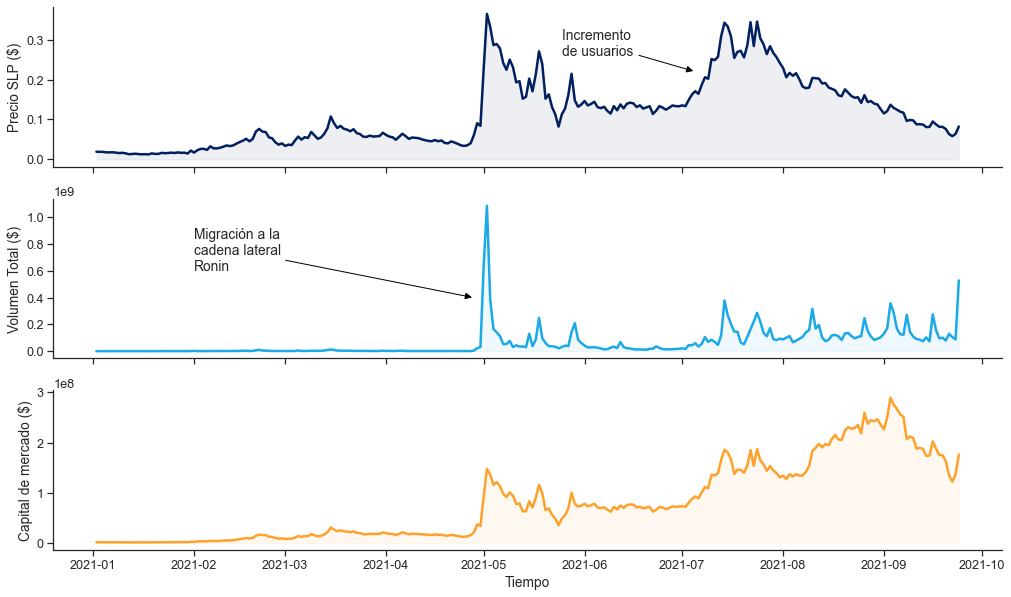

In [244]:
fig, [ax1, ax2, ax3] = plt.subplots(3,1,figsize=(17,10), sharex=True)

sns.lineplot(data=slp.price, linewidth=2.5, ax=ax1, color="#012060")
ax1.fill_between(slp.index, slp.price, color="#012060", alpha=0.07)
ax1.set_ylabel('Precio SLP ($)')
ax1.annotate('Incremento \nde usuarios', xy = (datetime(2021,7, 5), 0.22), 
             xycoords = 'data', xytext = (datetime(2021,5,25), 0.26), textcoords = 'data', 
             arrowprops = dict(arrowstyle = '-|>', color = '#000000'))

sns.lineplot(data=slp.total_volume, linewidth=2.5, color="#1ba9e7", ax=ax2)
ax2.fill_between(slp.index, slp.total_volume, color="#1ba9e7", alpha=0.07)
ax2.set_ylabel('Volumen Total ($)')
ax2.annotate('Migración a la\ncadena lateral\nRonin', xy = (datetime(2021,4,28), 0.4e9), 
             xycoords = 'data', xytext = (datetime(2021,2,1), 0.6e9), textcoords = 'data', 
             arrowprops = dict(arrowstyle = '-|>', color = '#000000'))

sns.lineplot(data=slp.market_cap, linewidth=2.5, color="#ffa12b", ax=ax3)
ax3.set_ylabel('Capital de mercado ($)')
ax3.set_xlabel('Tiempo')
ax3.fill_between(slp.index, slp.market_cap, color="#ffa12b", alpha=0.07)

sns.despine()
fig.savefig('./images/summary.png', transparent=True)

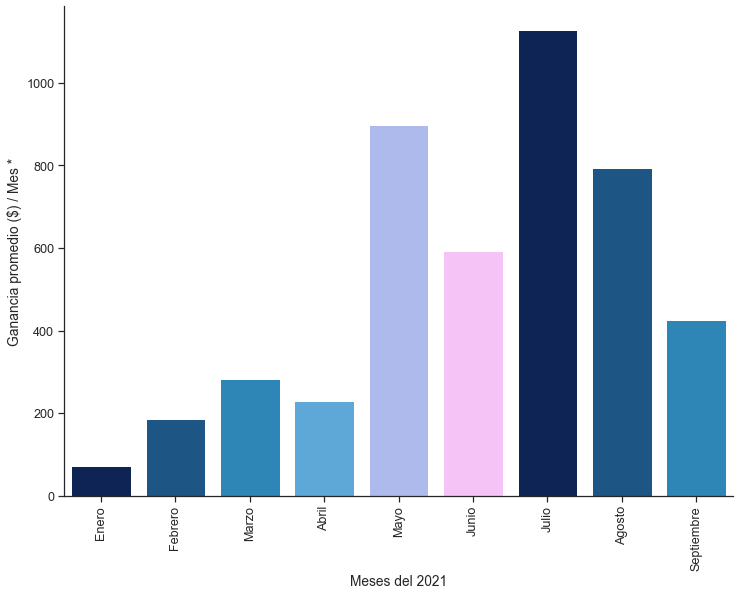

In [292]:
slp_mothly = slp.resample('M', label='left').mean()
slp_mothly.index = slp_mothly.index + timedelta(days=1)
average_earning.price = 150 * 30 * slp_mothly.price

fig = plt.figure(figsize=(12,9))

ax = sns.barplot(x=average_earning.index, y=average_earning.price, palette=sns.color_palette("blend:#012060,#1ba9e7,#febbfe"))
labels = [
    'Enero',
    'Febrero',
    'Marzo',
    'Abril',
    'Mayo',
    'Junio',
    'Julio',
    'Agosto',
    'Septiembre'
]
ax.set_xticklabels(labels, rotation = 90)
ax.set_xlabel('Meses del 2021')
ax.set_ylabel('Ganancia promedio ($) / Mes *')
sns.despine()
fig.savefig('./images/average_earning.png', transparent=True)

In [266]:
average_earning

date
2021-01-01      70.822364
2021-02-01     185.547814
2021-03-01     282.272870
2021-04-01     229.842076
2021-05-01     898.907203
2021-06-01     592.070107
2021-07-01    1128.740971
2021-08-01     793.458158
2021-09-01     425.424640
Name: price, dtype: float64